# 多输入多输出通道

In [1]:
import torch as tor
from d2l import torch as d2l_tor

In [3]:
def corr2d_multi_in(X, K):
    return sum(d2l_tor.corr2d(x, k) for x, k in zip(X, K))
# 这里我们可用对于zip函数做一个详解，其实zip函数的原理非常简单，就是我们的数组是拥有维数的，我们取每一个zip元素中的变量的最上一层作为迭代连续看层，然后拼成一个包发出去

In [7]:
# zip理解代码
a = tor.tensor([[1.0,2.0,3.0],[4.0,5.0,6.0]])
b = tor.tensor([1.0,2.0,3.0])
list(zip(a, b)) # 注意大括号就是包

[(tensor([1., 2., 3.]), tensor(1.)), (tensor([4., 5., 6.]), tensor(2.))]

验证互相关运算

In [8]:
X = tor.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = tor.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

In [11]:
K+ 1, K+ 2, K + 3

(tensor([[[[1., 2.],
           [3., 4.]],
 
          [[2., 3.],
           [4., 5.]]],
 
 
         [[[2., 3.],
           [4., 5.]],
 
          [[3., 4.],
           [5., 6.]]],
 
 
         [[[3., 4.],
           [5., 6.]],
 
          [[4., 5.],
           [6., 7.]]]]),
 tensor([[[[2., 3.],
           [4., 5.]],
 
          [[3., 4.],
           [5., 6.]]],
 
 
         [[[3., 4.],
           [5., 6.]],
 
          [[4., 5.],
           [6., 7.]]],
 
 
         [[[4., 5.],
           [6., 7.]],
 
          [[5., 6.],
           [7., 8.]]]]),
 tensor([[[[3., 4.],
           [5., 6.]],
 
          [[4., 5.],
           [6., 7.]]],
 
 
         [[[4., 5.],
           [6., 7.]],
 
          [[5., 6.],
           [7., 8.]]],
 
 
         [[[5., 6.],
           [7., 8.]],
 
          [[6., 7.],
           [8., 9.]]]]))

In [9]:
def corr2d_multi_in_out(X, K):
    return tor.stack([corr2d_multi_in(X, k) for k in K], 0)

K = tor.stack((K, K + 1, K + 2), 0)
K.shape

torch.Size([3, 2, 2, 2])

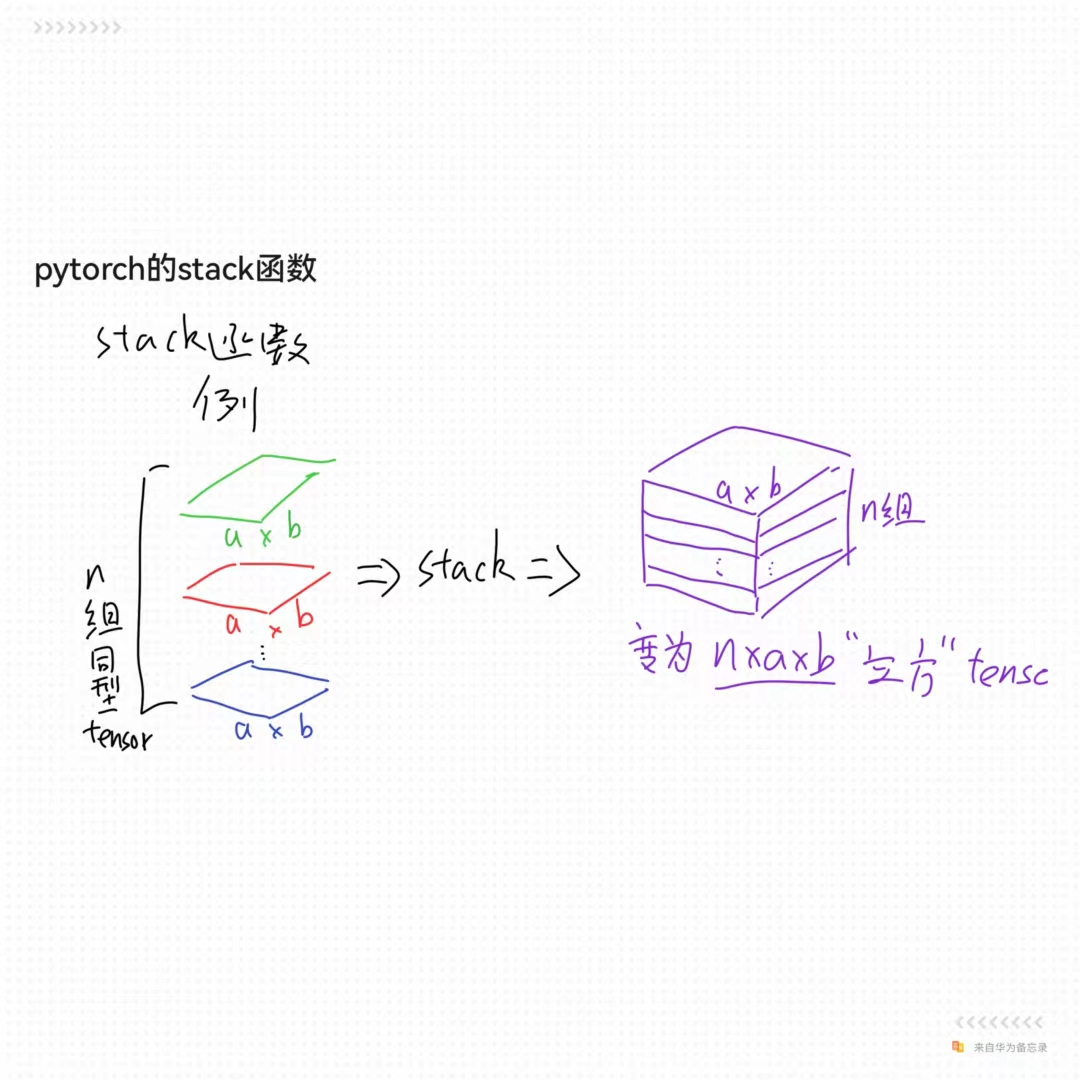

In [13]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i, h * w))
    K = K.reshape((c_o, c_i))
    Y = tor.matmul(K, X)
    return Y.reshape((c_o, h, w))

X = tor.normal(0, 1, (3, 3, 3))
K = tor.normal(0, 1, (2, 3, 1, 1))

Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(tor.abs(Y1 - Y2).sum()) < 1e-6 # 浮点精度

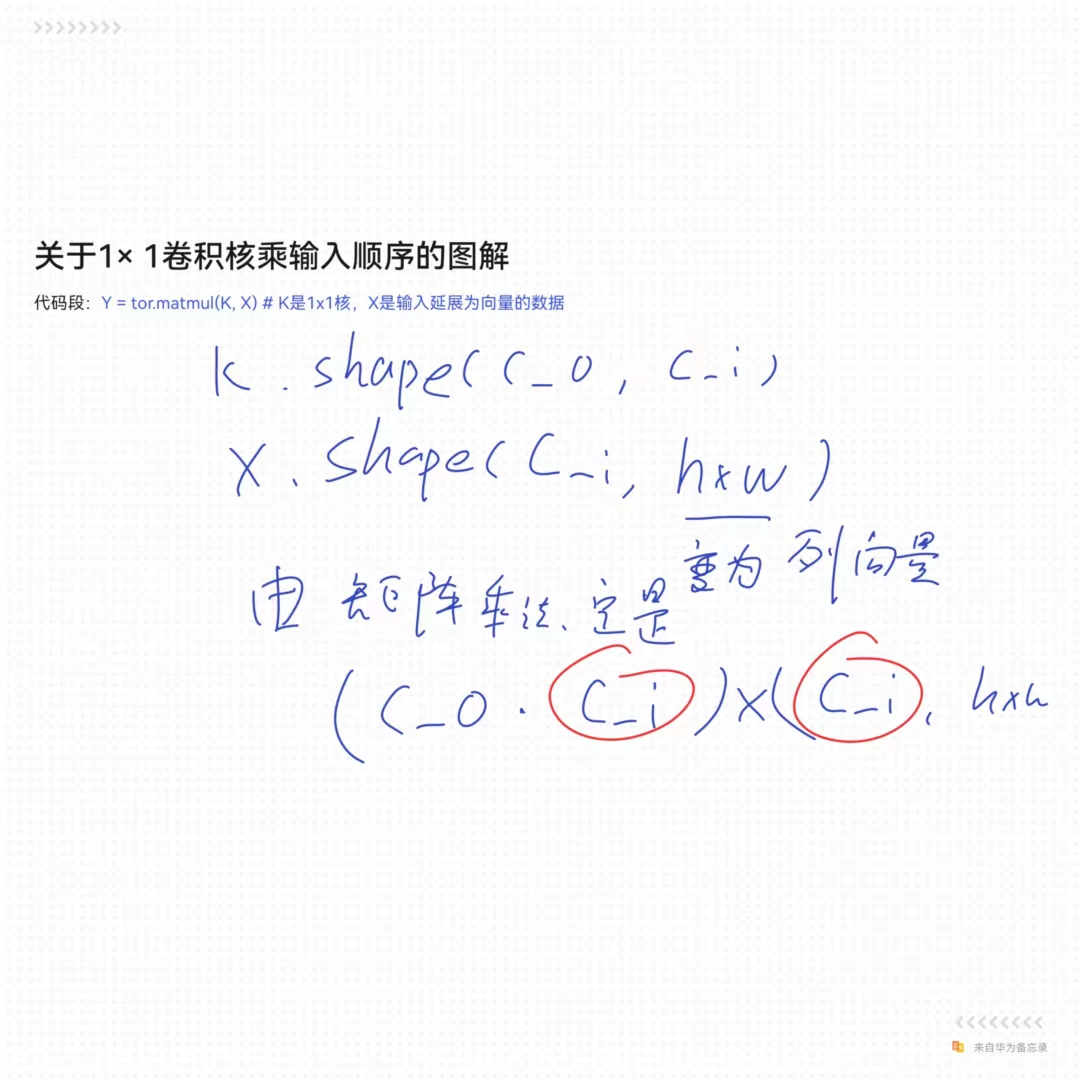

## pytorch调用

In [14]:
conv2d = tor.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 5), padding=1, stride=2)